## Assignment on Regression
Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better

In [176]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# load dataset
data=pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [179]:
# check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [180]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


no outliers or null values and hence checking for correlation

In [181]:
# to check for correlation of the variables
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<Axes: >

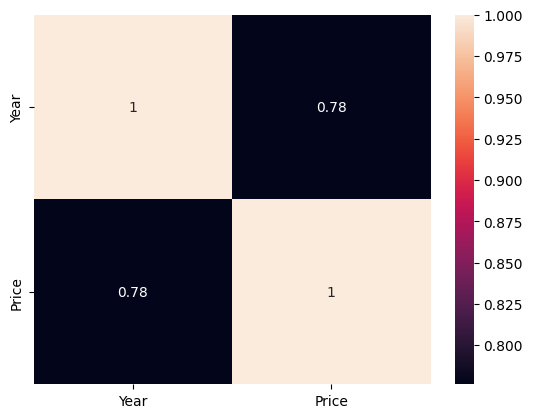

In [182]:
# to visualize correlation between Year and Price
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Price')

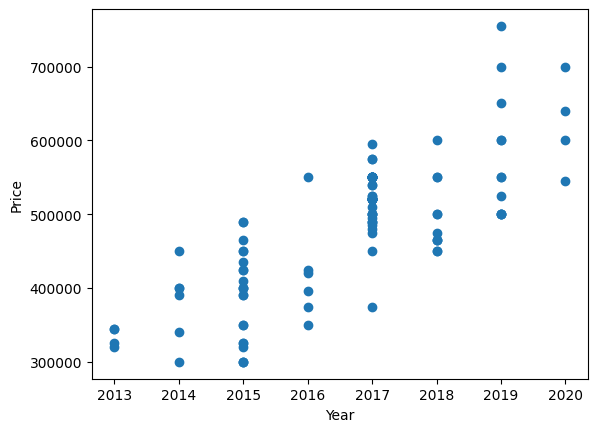

In [184]:
plt.scatter(data['Year'], data['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

# To find the best linear regression: split the data - target and feature, train & test model and predict

Y - target variable ie. Price

X - feature variable ie. Year

In [218]:
y=data['Price']
X=data.drop(['Price'], axis=1)

In [219]:
# import train test split from sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

Scaling the feature variable X before regression

In [220]:
# import StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [221]:
sc=StandardScaler()

In [222]:
X_train=sc.fit_transform(X_train)

In [223]:
X_test=sc.transform(X_test)

# Import Linear Regression to test and predict

In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
lin_reg=LinearRegression()

In [226]:
lin_reg=lin_reg.fit(X_train,y_train)

# Best Linear regression line

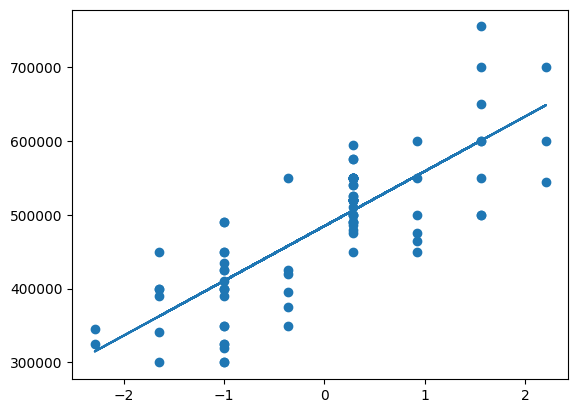

In [227]:
#plotting the best linear relationship between Year and Price
plt.scatter(X_train,y_train)
plt.plot(X_train,lin_reg.predict(X_train))

In [228]:
lin_pred=lin_reg.predict(X_test)

In [229]:
lin_pred

array([600775.91252082, 505558.77690466, 553167.34471274, 553167.34471274,
       553167.34471274, 410341.64128851, 505558.77690466, 553167.34471274,
       600775.91252082, 600775.91252082, 315124.50567236, 505558.77690466,
       410341.64128851, 648384.48032889, 553167.34471274, 600775.91252082,
       315124.50567236, 410341.64128851, 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [230]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

#Can you predict the possible price of a 2022 model second-hand grand i10?

In [231]:
# input the scaled year to predict the price
pred_price=lin_reg.predict(sc.transform([[2022]]))
print('Price of a 2022 model is: ',pred_price)

Price of a 2022 model is:  [743601.61594505]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Using metrics to check the predicted linear regression model
import MSE, R2 score and MAE from sklearn

In [232]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,lin_pred))

MSE is: 4326906256.829966


In [233]:
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,lin_pred))

R2 score is: 0.36759313425897877


In [234]:
from sklearn.metrics import mean_absolute_error
print('MAE is:',mean_absolute_error(y_test,lin_pred))

MAE is: 53534.77957001411


# Using Lasso Regression to predict the model and to compare with Linear Regression

In [235]:
# import Lasso from sklearn library
from sklearn.linear_model import Lasso

In [236]:
lasso=Lasso()

In [237]:
lasso_reg=lasso.fit(X_train,y_train)

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [239]:
y_pred=lasso.predict(X_test)

In [240]:
print('MSE is:',mean_squared_error(y_test,lin_pred))
print('MAE is:',mean_absolute_error(y_test,lin_pred))
print('R2_score is:',r2_score(y_test,lin_pred))

MSE is: 4326906256.829966
MAE is: 53534.77957001411
R2_score is: 0.36759313425897877


In [241]:
predict_price=lasso.predict(sc.transform([[2022]]))
print('Price of a 2022 model is: ',predict_price)

Price of a 2022 model is:  [743598.12443041]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted price for year 2022:

Linear Regression was : 743601
Lasso Regression was : 743598